In [0]:
#importing all dependencies

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.optimizers import Adam
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [0]:
#upload kaggle.json here to get access to the datasets see the procedure here (https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8)
from google.colab import files
files.upload()

In [0]:
!ls

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [0]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

In [0]:
import os
import zipfile
for file in os.listdir():
    zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
    zip_ref.extractall()
    zip_ref.close()

In [0]:
#giving path of the dataset
print(os.listdir("chest_xray"))

print(os.listdir("chest_xray/train"))

print(os.listdir("chest_xray/test"))


['val', 'train', 'test', 'chest_xray', '__MACOSX']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


NORMAL


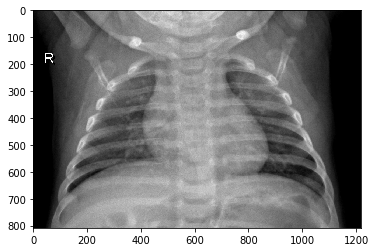

In [0]:
#showing image using matplotlib of normal xray
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

In [0]:
#setting image width and height to give input to the CNN
img_width, img_height = 150,150

In [0]:
#creating testing and training data 
train_data_dir = 'chest_xray/train'
validation_data_dir = 'chest_xray/val'
test_data_dir = 'chest_xray/test'

#values of the data are defined
nb_train_samples = 5216
nb_validation_samples = 16
epochs = 5
batch_size = 16

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.layers

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [0]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [0]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [0]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//nb_validation_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size)

In [0]:
scores = model.evaluate_generator(validation_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[1]*100))
scores = model.evaluate_generator(train_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))
scores = model.evaluate_generator(test_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))